In [89]:
import numpy as np

from phimal_utilities.data import Dataset
from phimal_utilities.data.burgers import BurgersDelta
from phimal_utilities.analysis import load_tensorboard

from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context='paper', style='white')

%config InlineBackend.figure_format = 'svg'

In [101]:
df_threshold = pd.read_pickle('data/threshold_collected.pd')
df_cluster = pd.read_pickle('data/cluster_collected.pd')
df_pdefind = pd.read_pickle('data/pdefind_collected.pd')

In [102]:
df_threshold = df_threshold.sort_values(by=['noise', 'run'])
df_threshold = df_threshold.reset_index(drop=True)

In [103]:
df_cluster = df_cluster.sort_values(by=['noise', 'run'])
df_cluster = df_cluster.reset_index(drop=True)

In [104]:
df_pdefind = df_pdefind.sort_values(by=['noise', 'run'])
df_pdefind = df_pdefind.reset_index(drop=True)

In [105]:
coeff_keys = [key for key in df_threshold.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_threshold.keys() if key[:6]=='scaled']
ini_keys = [key for key in df_threshold.keys() if key[:3]=='ini']

In [106]:
df_cluster.keys()

Index(['noise', 'run', 'first_sparsity', 'Total_loss', 'MSE_0', 'Regression_0',
       'L1_0', 'coeff_0_0', 'coeff_0_1', 'coeff_0_2', 'coeff_0_3', 'coeff_0_4',
       'coeff_0_5', 'coeff_0_6', 'coeff_0_7', 'coeff_0_8', 'coeff_0_9',
       'coeff_0_10', 'coeff_0_11', 'scaled_coeff_0_0', 'scaled_coeff_0_1',
       'scaled_coeff_0_2', 'scaled_coeff_0_3', 'scaled_coeff_0_4',
       'scaled_coeff_0_5', 'scaled_coeff_0_6', 'scaled_coeff_0_7',
       'scaled_coeff_0_8', 'scaled_coeff_0_9', 'scaled_coeff_0_10',
       'scaled_coeff_0_11', 'ini_scaled_coeff_0_0', 'ini_scaled_coeff_0_1',
       'ini_scaled_coeff_0_2', 'ini_scaled_coeff_0_3', 'ini_scaled_coeff_0_4',
       'ini_scaled_coeff_0_5', 'ini_scaled_coeff_0_6', 'ini_scaled_coeff_0_7',
       'ini_scaled_coeff_0_8', 'ini_scaled_coeff_0_9', 'ini_scaled_coeff_0_10',
       'ini_scaled_coeff_0_11'],
      dtype='object')

In [107]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

In [108]:
coeff_keys

['coeff_0_0',
 'coeff_0_1',
 'coeff_0_2',
 'coeff_0_3',
 'coeff_0_4',
 'coeff_0_5',
 'coeff_0_6',
 'coeff_0_7',
 'coeff_0_8',
 'coeff_0_9',
 'coeff_0_10',
 'coeff_0_11']

In [109]:
zero_coeffs = copy(coeff_keys)
zero_coeffs.pop(5)
zero_coeffs.pop(2)

'coeff_0_2'

In [110]:
# Making grid
x = np.linspace(-3, 4, 100)
t = np.linspace(0.5, 5.0, 50)
x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

# Making data
dataset = Dataset(BurgersDelta, v=0.1, A=1.0)
theta = dataset.library(x_grid.reshape(-1, 1), t_grid.reshape(-1, 1), poly_order=2, deriv_order=3)
dt = dataset.time_deriv(x_grid.reshape(-1, 1), t_grid.reshape(-1, 1))

In [111]:
true_coeffs_scaled = true_coeffs * np.linalg.norm(theta, axis=0) / np.linalg.norm(dt)

In [112]:
non_zero_terms = np.count_nonzero(df_threshold[zero_coeffs], axis=1)
non_zero_terms[non_zero_terms!=0] = 1
non_zero_terms = ~non_zero_terms.astype(bool)
df_threshold['correct'] = non_zero_terms

In [113]:
non_zero_terms = np.count_nonzero(df_cluster[zero_coeffs], axis=1)
non_zero_terms[non_zero_terms!=0] = 1
non_zero_terms = ~non_zero_terms.astype(bool)
df_cluster['correct'] = non_zero_terms

In [114]:
non_zero_terms = np.count_nonzero(df_pdefind[zero_coeffs], axis=1)
non_zero_terms[non_zero_terms!=0] = 1
non_zero_terms = ~non_zero_terms.astype(bool)
df_pdefind['correct'] = non_zero_terms

In [115]:
df_single = load_tensorboard('runs_correct/threshold_1.00_run_4/')

In [116]:
df_single.tail()

,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,coeff_0_4,coeff_0_5,...,scaled_coeff_0_2,scaled_coeff_0_3,scaled_coeff_0_4,scaled_coeff_0_5,scaled_coeff_0_6,scaled_coeff_0_7,scaled_coeff_0_8,scaled_coeff_0_9,scaled_coeff_0_10,scaled_coeff_0_11
2218,-2.935207,0.036598,0.000166,1.541396,0.0,0.0,0.092834,0.0,0.0,-0.994100,...,0.599376,0.0,0.0,-0.942020,0.0,0.0,0.0,0.0,0.0,0.0
2219,-2.935211,0.036598,0.000166,1.541473,0.0,0.0,0.092840,0.0,0.0,-0.994070,...,0.599495,0.0,0.0,-0.941978,0.0,0.0,0.0,0.0,0.0,0.0
2220,-2.935216,0.036598,0.000166,1.541619,0.0,0.0,0.092852,0.0,0.0,-0.994024,...,0.599652,0.0,0.0,-0.941966,0.0,0.0,0.0,0.0,0.0,0.0
2221,-2.935219,0.036598,0.000166,1.541793,0.0,0.0,0.092868,0.0,0.0,-0.993964,...,0.599822,0.0,0.0,-0.941971,0.0,0.0,0.0,0.0,0.0,0.0
2222,-2.935221,0.036598,0.000166,1.541943,0.0,0.0,0.092884,0.0,0.0,-0.993894,...,0.599971,0.0,0.0,-0.941972,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
active_terms = df_single[coeff_keys].to_numpy()[::30]
active_terms[np.abs(active_terms) > 0] = 1
active_terms = ~active_terms.astype(np.bool) # invert for color scheme

In [118]:
active_terms[-1, :]

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True])

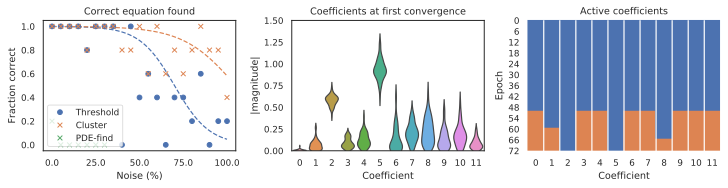

In [88]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2.5), constrained_layout=True)

# Left panel
ax = axes[0]

x = np.linspace(0, 1, 100)
ax.plot(x, (-np.tanh((x-0.7)/0.2) + 1)/2.0, linestyle='--', color=sns.color_palette()[0])
ax.plot(x, (-np.tanh((x-1.05)/0.3) + 1)/2.0, linestyle='--', color=sns.color_palette()[1])

ax.plot(df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'o', label='Threshold')
ax.plot(df_cluster.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'x', label='Cluster')
ax.plot(df_pdefind.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'x', label='PDE-find')
ax.set_xticks(np.linspace(0, 1.0, 5))
ax.set_xticklabels([tick * 100 for tick in ax.get_xticks()])


ax.legend(loc='lower left')
ax.set_ylabel('Fraction correct')
ax.set_xlabel('Noise (%)')
ax.set_title('Correct equation found')

# Right panel
ax = axes[2]

sns.heatmap(active_terms, ax=ax, cbar=False, rasterized=True, linewidths=0, cmap=sns.color_palette()[:2])
for coeff in np.arange(1, 12):
    ax.axvline(coeff, color='white')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Epoch')
ax.set_title('Active coefficients')
#ax.set_yticks(np.arange(0, 66, 10))
#ax.set_yticklabels((axes[2].get_yticks() * 30).astype(int))


# Middle panel
ax = axes[1]
df_violin = np.abs(df_threshold.query('correct == True')[ini_keys])#np.abs(df_threshold[df_threshold['correct'] == True][ini_keys])
df_violin.columns=np.sort([int(key.split('_')[-1]) for key in df_violin.keys()])
df_violin = df_violin.melt(var_name='Coefficient', value_name='|magnitude|')
sns.violinplot(y="|magnitude|", x="Coefficient", data=df_violin, scale='count', ax=ax, inner=None)
ax.set_title('Coefficients at first convergence')
ax.set_ylim([0, 1.5])

fig.show()
plt.savefig('figure_5.pdf', )

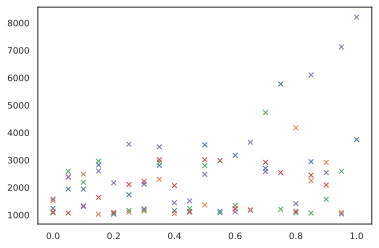

In [131]:
plt.plot(df_cluster.query('first_sparsity != -1').pivot(index='noise', columns='run', values='first_sparsity'), 'x')

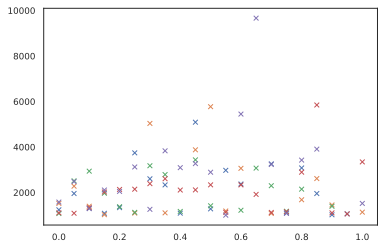

In [132]:
plt.plot(df_threshold.query('first_sparsity != -1').pivot(index='noise', columns='run', values='first_sparsity'), 'x')

In [120]:
df_cluster.query('correct == False')

,noise,run,first_sparsity,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
21,0.20,1,-1,-9.404669,0.001442,0.000003,2.797988,0.000826,0.018031,0.085771,...,-0.124145,-0.038641,-1.082446,0.359384,0.147447,0.079212,0.081743,-0.241382,-0.060896,False
42,0.40,2,-1,-6.615659,0.005814,0.000020,2.819074,0.002133,-0.010369,0.089877,...,-0.189401,0.010003,-1.028435,0.200997,0.285131,-0.050396,0.132076,-0.217267,-0.120222,False
46,0.45,1,-1,-6.125638,0.007434,0.000014,5.164794,0.000572,0.044331,0.059872,...,-0.250011,0.082785,-1.372513,1.063003,0.313953,-0.070985,0.453196,-1.048576,0.026721,False
56,0.55,1,-1,-5.402029,0.010671,0.000028,3.500176,0.000196,-0.066587,0.100596,...,0.016879,0.204574,-0.593960,-0.624005,0.239148,-0.405674,-0.114006,0.254585,-0.192425,False
59,0.55,4,-1,-5.424809,0.010547,0.000034,3.428565,0.002219,0.007204,0.077088,...,-0.237302,0.090606,-1.126358,0.264541,0.340274,-0.156254,0.221800,-0.351575,-0.088717,False
67,0.65,2,-1,-4.745288,0.014819,0.000039,5.184490,0.004876,0.065131,0.072094,...,-0.416553,-0.123615,-1.466298,0.909614,0.369939,0.220070,0.334612,-0.694799,-0.033358,False
68,0.65,3,-1,-4.699982,0.015153,0.000052,4.517958,-0.001908,0.129879,0.105913,...,-0.301714,-0.097142,-1.332593,0.696873,-0.225845,0.287385,-0.188909,-0.366126,0.153599,False
71,0.70,1,-1,-4.390371,0.017695,0.000049,4.857670,-0.001699,-0.060082,0.074558,...,-0.725181,0.235036,-0.837826,-0.194045,1.195385,-0.376809,0.003110,0.058103,-0.582844,False
76,0.75,1,-1,-4.154790,0.019914,0.000043,6.259877,0.000509,0.015489,0.076532,...,-0.727319,0.118680,-1.555449,0.602714,0.950289,-0.140906,0.644246,-0.661965,-0.297302,False
79,0.75,4,-1,-4.103479,0.020437,0.000032,5.358263,-0.003784,0.032491,0.058402,...,-0.535120,0.055843,-1.469498,0.798547,0.630512,-0.056961,0.461107,-0.694734,-0.174504,False


In [123]:
df_threshold.query('correct == False & first_sparsity==-1')

,noise,run,first_sparsity,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
21,0.20,1,-1,-9.395013,0.001449,0.000005,2.696230,0.000009,-0.003193,0.085762,...,-0.123097,0.024334,-1.056361,0.317308,0.132072,-0.020052,0.134689,-0.305526,-0.013831,False
41,0.40,1,-1,-6.742456,0.005459,0.000016,3.519629,-0.000192,0.002872,0.085764,...,-0.192748,0.037023,-1.119521,0.472721,0.305558,-0.022786,0.233241,-0.497972,-0.077137,False
57,0.55,2,-1,-5.395164,0.010709,0.000026,4.864866,-0.000419,-0.046038,0.060344,...,-0.277817,0.115945,-1.161258,0.771224,0.496057,-0.166310,0.436179,-0.788589,-0.148109,False
65,0.65,0,-1,-4.669731,0.015387,0.000046,3.292261,0.000627,-0.050798,0.083911,...,-0.172965,0.161331,-0.947306,-0.147992,0.375714,-0.333850,0.180949,-0.095978,-0.197929,False
66,0.65,1,-1,-4.754090,0.014744,0.000059,4.156135,-0.000727,-0.010701,0.093065,...,-0.275279,0.163248,-1.028707,-0.489634,0.484726,-0.291248,0.155982,0.368101,-0.262488,False
76,0.75,1,-1,-4.119444,0.020266,0.000048,5.977429,0.005312,0.001702,0.040098,...,-0.583282,-0.008641,-1.199635,1.160056,0.997018,-0.013272,0.326206,-1.027611,-0.366604,False
87,0.85,2,-1,-3.656769,0.025529,0.000086,8.071039,-0.007652,-0.096377,0.159536,...,0.757832,0.307669,-0.234868,-2.135715,-0.755692,-0.595219,-0.263661,1.445485,0.208750,False
94,0.90,4,-1,-3.395336,0.029115,0.000055,3.757152,0.003250,-0.053817,0.095174,...,-0.458109,-0.027822,-0.586455,0.210043,0.678128,0.011045,-0.332197,-0.347627,-0.307942,False
96,0.95,1,-1,-3.151353,0.032873,0.000101,3.820868,-0.007899,-0.009825,0.099028,...,0.031282,0.307506,-1.207633,-0.418004,0.105414,-0.487716,0.510566,0.016939,-0.007536,False
97,0.95,2,-1,-3.244132,0.031383,0.000096,3.823376,0.000914,-0.069611,0.073046,...,-0.314719,0.278860,-0.579377,-0.225900,0.507149,-0.405305,-0.317892,0.229587,-0.328200,False


In [124]:
df_threshold.query('correct == False & first_sparsity!=-1')

,noise,run,first_sparsity,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
40,0.40,0,1093,-6.581088,0.005897,0.000058,1.736060,0.0,-0.061085,0.083370,...,-0.052506,0.208810,-0.750362,-0.081931,0.267728,-0.465304,0.205746,-0.258705,-0.097772,False
42,0.40,2,1168,-6.629896,0.005757,0.000053,1.697730,0.0,0.000000,0.099507,...,-0.299320,0.194139,-0.929996,0.152971,0.653631,-0.360893,0.208632,-0.367144,-0.307167,False
43,0.40,3,2109,-6.560508,0.005968,0.000038,1.720668,0.0,0.000000,0.101499,...,-0.164955,0.149797,-0.851335,0.276975,0.392633,-0.261346,0.111866,-0.396404,-0.170110,False
44,0.40,4,3093,-6.637411,0.005743,0.000037,1.752772,0.0,0.000000,0.103101,...,-0.140410,0.089893,-0.911385,0.068324,0.311760,-0.174561,0.100119,-0.239592,-0.133588,False
51,0.50,1,5773,-5.751619,0.008956,0.000031,1.754675,0.0,0.000000,0.104989,...,0.082361,0.044631,-0.827012,-0.219263,0.082138,-0.128555,0.091427,-0.072254,-0.048973,False
52,0.50,2,1417,-5.746117,0.008967,0.000058,1.713389,0.0,0.000000,0.102485,...,-0.117063,0.201018,-0.966693,0.015880,0.319864,-0.352160,0.269009,-0.323147,-0.105626,False
54,0.50,4,2892,-5.702635,0.009171,0.000046,1.763027,0.0,0.000000,0.112524,...,0.026627,0.188299,-0.950494,-0.267677,0.123446,-0.351650,0.273854,-0.126973,-0.030643,False
56,0.55,1,1188,-5.409978,0.010628,0.000031,1.715286,0.0,0.000000,0.106945,...,-0.269239,0.261795,-1.022961,0.064802,0.604057,-0.449922,0.305762,-0.333614,-0.280443,False
60,0.60,0,2375,-5.015985,0.012934,0.000052,1.727397,0.0,0.000000,0.110025,...,-0.117460,0.106702,-1.212107,0.335126,0.272464,-0.176387,0.371297,-0.541694,-0.036708,False
63,0.60,3,2335,-5.022806,0.012902,0.000028,1.620571,0.0,-0.046080,0.090578,...,0.081022,0.166694,-0.525616,-0.200076,0.060966,-0.289969,-0.179899,0.004038,-0.079413,False


In [36]:
df_threshold.query('noise == 1.0')

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
100,1.0,0,-2.974359,0.035928,0.000085,4.761721,0.004934,0.08277,0.055141,-0.002483,...,-0.094037,0.143314,-1.557897,0.703068,0.157117,-0.205715,0.604858,-0.716290,0.036388,False
101,1.0,1,-2.993860,0.035571,0.000101,3.473529,0.000000,0.00000,0.096228,-0.010065,...,-0.388059,0.213163,-1.155526,0.136082,0.865008,-0.407809,0.427166,-0.496056,-0.400493,False
102,1.0,2,-2.994793,0.035503,0.000203,4.724005,0.006351,-0.05815,0.044692,-0.004425,...,-0.253938,0.277369,-0.926694,0.482415,0.577801,-0.546005,0.263677,-0.727605,-0.205202,False
103,1.0,3,-2.971959,0.035946,0.000135,1.868202,0.000000,0.00000,0.100930,0.000000,...,-0.007586,0.031918,-0.966810,-0.114860,0.250717,-0.180131,0.221781,-0.271306,-0.101446,False
104,1.0,4,-2.935221,0.036598,0.000166,1.541943,0.000000,0.00000,0.092884,0.000000,...,-0.154699,0.113054,-0.892563,-0.058392,0.281413,-0.315221,0.042730,-0.035776,-0.190556,True


In [35]:
np.abs(df_cluster.query('correct == True')[ini_keys])

,ini_scaled_coeff_0_0,ini_scaled_coeff_0_1,ini_scaled_coeff_0_2,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11
0,0.014795,0.037114,0.640451,0.034422,0.026790,0.821373,0.024004,0.116916,0.023068,0.064379,0.008052,0.057621
2,0.006385,0.006630,0.608247,0.026758,0.072892,0.944623,0.113503,0.055096,0.092138,0.050253,0.144421,0.010439
3,0.001624,0.022292,0.579041,0.113989,0.080600,0.985564,0.125854,0.239850,0.133214,0.131927,0.223786,0.088290
4,0.003484,0.024019,0.689079,0.030485,0.099235,0.896343,0.058159,0.000628,0.097461,0.026868,0.035879,0.029309
5,0.000645,0.014815,0.618884,0.059649,0.034347,0.917001,0.003254,0.125034,0.058787,0.029841,0.040640,0.036189
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.017435,0.177712,0.577185,0.067304,0.232778,0.782111,0.049071,0.329915,0.392131,0.193673,0.363554,0.133659
95,0.001235,0.302650,0.725981,0.143617,0.151196,0.338448,0.191193,0.190568,0.306544,0.004792,0.357800,0.027370
96,0.029250,0.121787,0.627198,0.052232,0.042745,0.871265,0.009407,0.266737,0.141958,0.225683,0.201035,0.099591
97,0.002831,0.210107,0.660194,0.026263,0.152567,0.567295,0.158437,0.364541,0.325365,0.004973,0.282264,0.197882


In [318]:
sns.palplot()

TypeError: palplot() missing 1 required positional argument: 'pal'

In [ ]:
axes[2].get_yt

In [ ]:
df_violin.rename(columns=[key[-1] for key in df_violin.keys()])

In [319]:
[key for key in df_violin.keys()]

['Coefficient', '|magnitude|']

In [193]:
ini_keys

['ini_scaled_coeff_0_0',
 'ini_scaled_coeff_0_1',
 'ini_scaled_coeff_0_2',
 'ini_scaled_coeff_0_3',
 'ini_scaled_coeff_0_4',
 'ini_scaled_coeff_0_5',
 'ini_scaled_coeff_0_6',
 'ini_scaled_coeff_0_7',
 'ini_scaled_coeff_0_8',
 'ini_scaled_coeff_0_9',
 'ini_scaled_coeff_0_10',
 'ini_scaled_coeff_0_11']

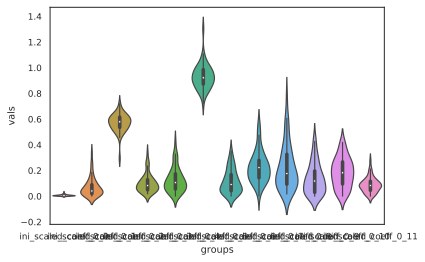

In [191]:
sns.violinplot(y="vals", x="groups", data=df_violin, scale='count')
#sns.swarmplot(y="vals", x="groups", data=df_violin, color='white')

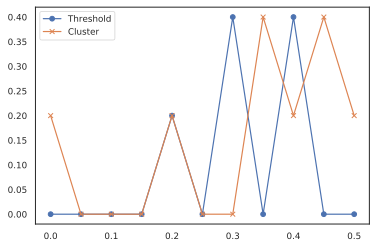

In [72]:
plt.plot(1-df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'o-', label='Threshold')
plt.plot(1-df_cluster.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'x-', label='Cluster')

plt.legend()

Float64Index([                0.0,                0.05,                 0.1,
              0.15000000000000002,                 0.2,                0.25,
              0.30000000000000004, 0.35000000000000003,                 0.4,
                             0.45,                 0.5],
             dtype='float64', name='noise')

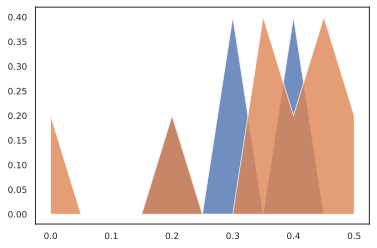

In [74]:
plt.fill_between(df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1).index, y1 = 1 - df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1), alpha=0.8)
plt.fill_between(df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1).index, y1 = 1 - df_cluster.pivot(index='noise', columns='run', values='correct').mean(axis=1), alpha=0.8)

In [78]:
df_results = pd.concat((df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1),df_cluster.pivot(index='noise', columns='run', values='correct').mean(axis=1)), axis=1)

In [79]:
df_results = df_results.reset_index()

In [80]:
df_results.head()

,noise,0,1
0,0.00,1.0,0.8
1,0.05,1.0,1.0
2,0.10,1.0,1.0
3,0.15,1.0,1.0
4,0.20,0.8,0.8


In [81]:
df_results = df_results.melt(id_vars='noise')

In [82]:
df_results.head()

,noise,variable,value
0,0.00,0,1.0
1,0.05,0,1.0
2,0.10,0,1.0
3,0.15,0,1.0
4,0.20,0,0.8


In [163]:
df_results['value'] = 1 - df_results['value'][::2]

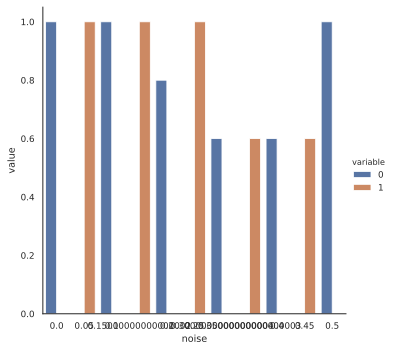

In [164]:
sns.catplot(x="noise", y='value', hue='variable', kind='bar', data=df_results)

In [25]:
df_cluster[df_cluster['correct'] == False]

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
6,0.00,1,5.096312,2.027076,0.014939,1.264369,0.082730,-0.588809,0.000000,0.000000,...,-0.095997,0.027564,-1.034025,0.282358,0.154054,-0.036855,0.135586,-0.294778,-0.015750,False
27,0.20,2,-7.909840,0.002519,0.000962,1.212148,0.000000,0.000000,0.000000,0.000000,...,-0.596162,0.958782,1.045090,2.328924,1.015563,-0.872608,-1.778665,-1.564806,-0.563751,False
36,0.35,1,-7.214064,0.004312,0.000013,3.304737,0.001906,0.047990,0.085493,-0.002543,...,-0.095623,-0.017837,-1.281952,0.235675,0.288561,0.013491,0.335254,-0.227329,-0.151547,False
38,0.35,3,-7.142105,0.004434,0.000085,4.457133,0.004157,-0.113020,0.046368,-0.004984,...,-0.202418,0.325535,-0.778654,0.334389,0.471895,-0.639107,0.275086,-0.664219,-0.150839,False
42,0.45,2,-6.240277,0.007011,0.000032,3.476504,-0.002959,-0.077565,0.087934,-0.001807,...,-0.085061,0.246824,-0.850393,-0.304354,0.317407,-0.436800,0.188576,-0.054152,-0.183497,False
44,0.45,4,4.530239,1.532991,0.000067,8.077715,0.014969,-1.511475,-1.220947,-0.837402,...,-0.482580,-0.673264,0.568798,1.038893,0.474441,0.516839,0.564120,-0.640336,-0.189149,False
49,0.40,4,-2.334984,0.049507,0.000028,5.895633,0.000000,1.001835,0.000000,0.000000,...,0.148312,-0.262880,-0.565093,0.052939,0.185198,0.423520,-0.069995,0.372085,-0.040791,False
53,0.50,3,-5.773970,0.008863,0.000017,4.094117,-0.000490,0.041617,0.088102,-0.004299,...,-0.167371,-0.001250,-1.380727,0.526559,0.202297,0.029046,0.481245,-0.596587,0.050820,False


In [26]:
df_threshold[df_threshold['correct'] == False]

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
27,0.2,2,3.962025,1.153858,0.000057,70.358772,-0.835938,-8.515625,7.523438,1.226562,...,9.519939,-2.862038,-22.621502,12.771106,-18.846016,-1.733596,11.486465,-6.745155,9.409417,False
32,0.3,2,-7.733115,0.003270,0.000120,4.444751,0.003197,-0.142467,0.038360,-0.005714,...,-0.289095,0.335530,-0.601027,0.236967,0.738548,-0.647750,0.097390,-0.466514,-0.396965,False
34,0.3,4,-7.842829,0.003138,0.000030,1.705825,0.000000,0.000000,0.099706,0.000000,...,-0.146952,0.208724,-0.850432,0.016054,0.398491,-0.406323,0.215922,-0.297881,-0.168692,False
48,0.4,3,-6.628658,0.005778,0.000016,3.967320,0.001418,-0.021343,0.077817,-0.009044,...,-0.435356,0.067454,-0.999091,0.341726,0.649826,-0.123701,0.116659,-0.406479,-0.244752,False
49,0.4,4,-0.606042,0.117545,0.000009,44.649429,-0.015480,-4.359375,2.238281,-0.349976,...,-5.710771,14.000711,33.362648,-38.321030,8.717766,-13.175140,-15.998489,18.703190,-3.259660,False


In [27]:
df_single = load_tensorboard('runs/threshold_0.2_run_3/')

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [28]:
active_terms = df_single[coeff_keys].to_numpy()
active_terms[np.abs(active_terms) > 0] = 1

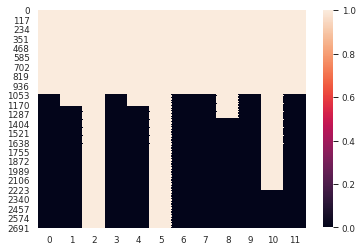

In [29]:
sns.heatmap(active_terms)

In [30]:
df_threshold.groupby()

TypeError: You have to supply one of 'by' and 'level'

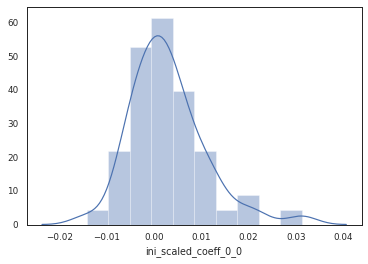

In [39]:
sns.distplot(df_threshold[df_threshold['correct'] == True][ini_keys[0]], bins='auto')

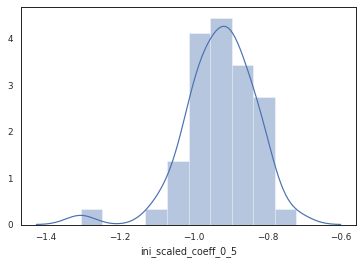

In [43]:
sns.distplot(df_threshold[df_threshold['correct'] == True][ini_keys[5]], bins='auto')

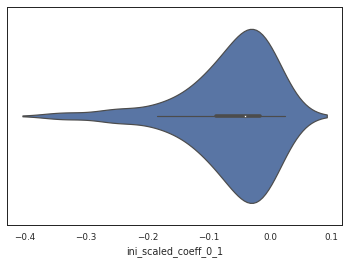

In [46]:
sns.violinplot(x=ini_keys[1], data=df_threshold[df_threshold['correct'] == True][ini_keys])

In [94]:
ini_keys

['ini_scaled_coeff_0_0',
 'ini_scaled_coeff_0_1',
 'ini_scaled_coeff_0_2',
 'ini_scaled_coeff_0_3',
 'ini_scaled_coeff_0_4',
 'ini_scaled_coeff_0_5',
 'ini_scaled_coeff_0_6',
 'ini_scaled_coeff_0_7',
 'ini_scaled_coeff_0_8',
 'ini_scaled_coeff_0_9',
 'ini_scaled_coeff_0_10',
 'ini_scaled_coeff_0_11']

In [407]:
df_violin = np.abs(df_cluster[df_cluster['correct'] == True][ini_keys]).melt(var_name='groups', value_name='vals')

In [408]:
df_violin

,groups,vals
0,ini_scaled_coeff_0_0,0.000645
1,ini_scaled_coeff_0_0,0.002444
2,ini_scaled_coeff_0_0,0.000542
3,ini_scaled_coeff_0_0,0.008595
4,ini_scaled_coeff_0_0,0.025273
...,...,...
979,ini_scaled_coeff_0_11,0.133659
980,ini_scaled_coeff_0_11,0.027370
981,ini_scaled_coeff_0_11,0.099591
982,ini_scaled_coeff_0_11,0.197882


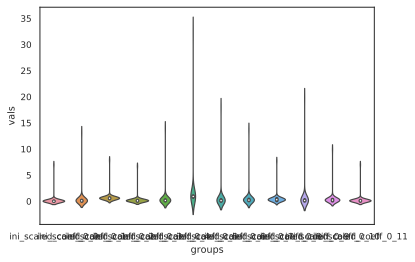

In [409]:
sns.violinplot(data = df_violin, x= 'groups', y ='vals', )

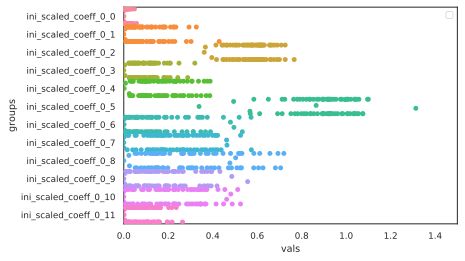

In [411]:
sns.swarmplot(x="vals", y="groups", data=df_violin)
plt.xlim([0.0, 1.5])
plt.legend({})

In [22]:
x_idx, y_idx = np.unravel_index(4, (4, 4))

In [23]:
x_idx

1

In [ ]:
for arena_idx, dict in enumerate(self.pattern):
            x_idx, y_idx = np.unravel_index(arena_idx, (4, 4))
            dict['ArenePos'] = np.array([left_x + x_idx * width_arene, top_y + y_idx * height_arene, width_arene, height_arene ])#x,y,w,h
            posArene.append([arena_idx,(left_x + x_idx * width_arene, top_y + y_idx * height_arene),(left_x + (x_idx + 1) * width_arene, top_y + (y_idx + 1) * height_arene)])
            logging.info('Arene %d x:%d y:%d w %d h:%d',
                arena_idx,
                left_x + x_idx * width_arene,
                top_y + y_idx * height_arene,
                width_arene,
                height_arene
                ) 

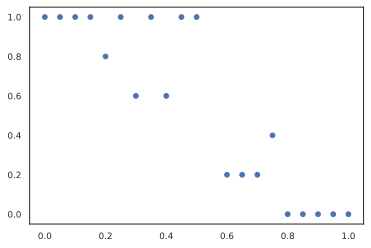

In [300]:
plt.plot(df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'o', label='Threshold')

In [419]:
df_threshold.query('noise == 0.0 & run == 1')

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
6,0.0,1,-16.411366,0.000041,0.000004,1.58501,0.0,0.0,0.099478,0.0,...,-0.095997,0.027564,-1.034025,0.282358,0.154054,-0.036855,0.135586,-0.294778,-0.01575,True


In [418]:
df_cluster.query('noise == 0.0 & run == 1')

,noise,run,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,coeff_0_3,...,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11,correct
6,0.0,1,5.096312,2.027076,0.014939,1.264369,0.08273,-0.588809,0.0,0.0,...,-0.095997,0.027564,-1.034025,0.282358,0.154054,-0.036855,0.135586,-0.294778,-0.01575,False


In [6]:
df_threshold = df_threshold.sort_values(by=['noise', 'run'])
df_threshold.reset_index

AttributeError: 'function' object has no attribute 'sort_values'

In [146]:
df_cluster.loc[10]

noise                            0.1
run                                0
Total_loss                  -12.1529
MSE_0                    0.000362477
Regression_0             5.97091e-06
L1_0                         1.56952
coeff_0_0                          0
coeff_0_1                          0
coeff_0_2                  0.0988973
coeff_0_3                          0
coeff_0_4                          0
coeff_0_5                   -0.99875
coeff_0_6                          0
coeff_0_7                          0
coeff_0_8                          0
coeff_0_9                          0
coeff_0_10                         0
coeff_0_11                         0
scaled_coeff_0_0                   0
scaled_coeff_0_1                   0
scaled_coeff_0_2            0.633346
scaled_coeff_0_3                   0
scaled_coeff_0_4                   0
scaled_coeff_0_5           -0.936173
scaled_coeff_0_6                   0
scaled_coeff_0_7                   0
scaled_coeff_0_8                   0
s

In [147]:
df_threshold.loc[10]

noise                            0.1
run                                0
Total_loss                  -12.1647
MSE_0                    0.000359362
Regression_0              7.8637e-06
L1_0                         1.56889
coeff_0_0                          0
coeff_0_1                          0
coeff_0_2                   0.100069
coeff_0_3                          0
coeff_0_4                          0
coeff_0_5                   -1.00183
coeff_0_6                          0
coeff_0_7                          0
coeff_0_8                          0
coeff_0_9                          0
coeff_0_10                         0
coeff_0_11                         0
scaled_coeff_0_0                   0
scaled_coeff_0_1                   0
scaled_coeff_0_2            0.633692
scaled_coeff_0_3                   0
scaled_coeff_0_4                   0
scaled_coeff_0_5           -0.935198
scaled_coeff_0_6                   0
scaled_coeff_0_7                   0
scaled_coeff_0_8                   0
s

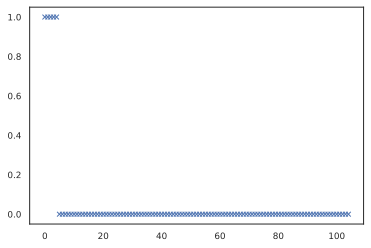

In [148]:
plt.plot(df_cluster[ini_keys[0]] == df_threshold[ini_keys[0]], 'x')

In [443]:
df_threshold[ini_keys[0]]

5     0.014795
6     0.003426
7    -0.006385
8     0.001624
9    -0.003484
        ...   
95   -0.008130
96    0.006266
97    0.055950
98   -0.000500
99   -0.060211
Name: ini_scaled_coeff_0_0, Length: 100, dtype: float64

# Checking

In [40]:
df_single_threshold = load_tensorboard(f'runs_correct/threshold_0.0_run_4/')
df_single_cluster = load_tensorboard(f'runs_correct/cluster_0.0_run_4/')

In [45]:
noise = 0.05
run = 0
df_single_threshold = load_tensorboard(f'runs_final/threshold_{noise:.2f}_run_{run}/')
df_single_cluster = load_tensorboard(f'runs_final/cluster_{noise:.2f}_run_{run}/')

In [46]:
df_single_cluster.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11'],
      dtype='object')

(0, 1000)

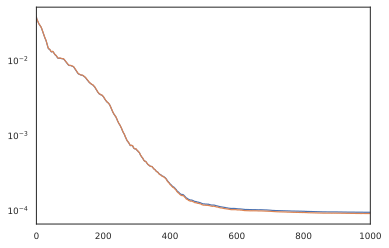

In [47]:
plt.semilogy(df_single_cluster.index, df_single_cluster.MSE_0)
plt.semilogy(df_single_threshold.index, df_single_threshold.MSE_0)

plt.xlim([0, 1000])

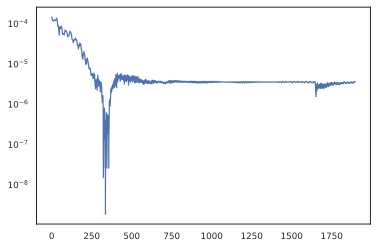

In [50]:
plt.semilogy(np.abs(df_single_cluster.MSE_0 - df_single_threshold.MSE_0))

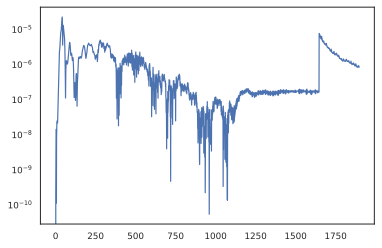

In [52]:
plt.semilogy(np.abs(df_single_cluster.Regression_0 - df_single_threshold.Regression_0))

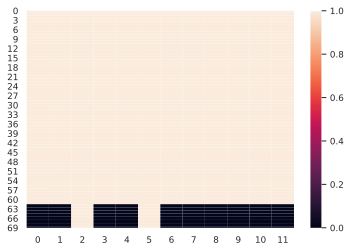

In [58]:
active_terms = df_single_threshold[coeff_keys].to_numpy()[::30]
active_terms[np.abs(active_terms) > 0] = 1
sns.heatmap(active_terms)

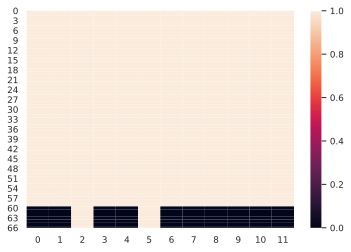

In [59]:
active_terms = df_single_cluster[coeff_keys].to_numpy()[::30]
active_terms[np.abs(active_terms) > 0] = 1
sns.heatmap(active_terms)

In [164]:
np.argmax(df_single_cluster[coeff_keys[0]] == 0.0)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


1153

In [165]:
np.argmax(df_single_threshold[coeff_keys[0]] == 0.0)

1094

(0, 2000)

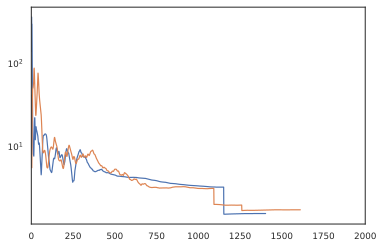

In [166]:
plt.semilogy(df_single_cluster.index, df_single_cluster.L1_0)
plt.semilogy(df_single_threshold.index, df_single_threshold.L1_0)

plt.xlim([0, 2000])

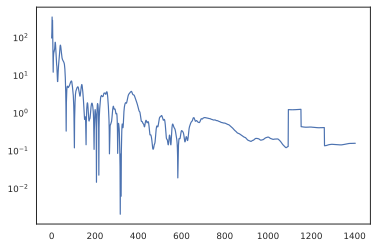

In [167]:
plt.semilogy(np.abs(df_single_cluster.L1_0 - df_single_threshold.L1_0))

(-1, 1)

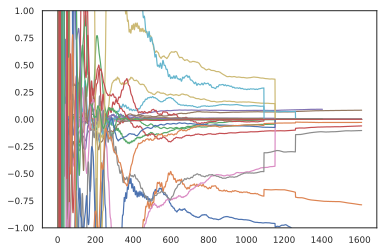

In [168]:
for key in coeff_keys:
    plt.plot(df_single_cluster.index, df_single_cluster[key])
    plt.plot(df_single_threshold.index, df_single_threshold[key])
plt.ylim([-1, 1])

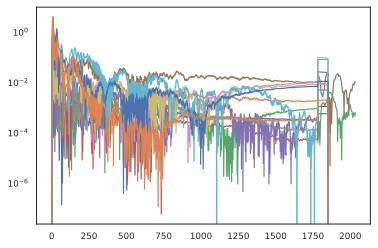

In [79]:
for key in coeff_keys:
    plt.semilogy(df_single_threshold.index, np.abs(df_single_cluster[key] - df_single_threshold[key]))

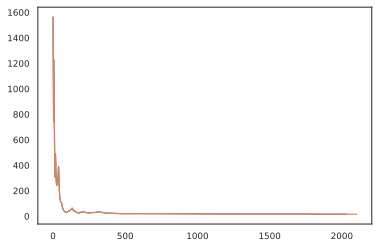

In [90]:
plt.plot(np.sum(np.abs(df_single_cluster), axis=1))
plt.plot(np.sum(np.abs(df_single_threshold), axis=1))

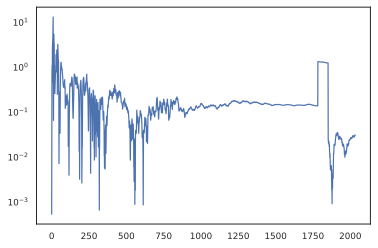

In [100]:
plt.semilogy(np.abs(np.sum(np.abs(df_single_cluster), axis=1) - np.sum(np.abs(df_single_threshold), axis=1)))

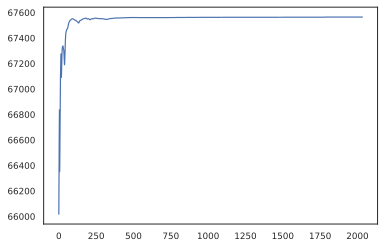

In [93]:
plt.plot(np.abs(np.sum(np.abs(df_single_cluster) - np.sum(np.abs(df_single_threshold)), axis=1)))

(0, 250)

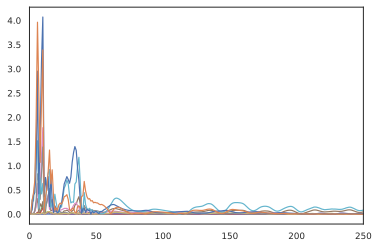

In [84]:
for key in coeff_keys:
    plt.plot(df_single_threshold.index, np.abs(df_single_cluster[key] - df_single_threshold[key]))
plt.xlim([0, 250])

(0, 500)

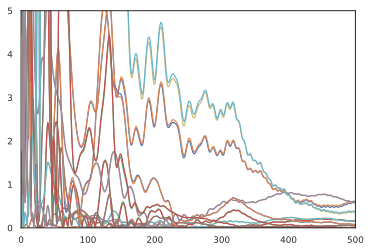

In [82]:
for key in coeff_keys:
    plt.plot(df_single_cluster.index, np.abs(df_single_cluster[key]))
    plt.plot(df_single_threshold.index, np.abs(df_single_threshold[key]))
plt.ylim([0, 5])
plt.xlim([0, 500])

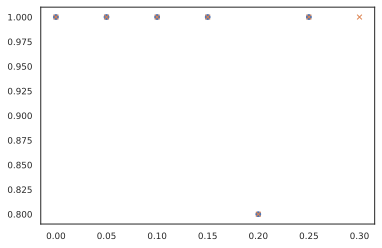

In [25]:
plt.plot(df_threshold.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'o', label='Threshold')
plt.plot(df_cluster.pivot(index='noise', columns='run', values='correct').mean(axis=1), 'x', label='Cluster')